In [12]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.fft import fft, rfft, ifft, irfft
from scipy.fft import fftfreq, rfftfreq
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.express as px
import matplotlib.pyplot as plt

# Read the Excel file
for year in [21]:
    yearnum = 0
    if year%4==0:
        yearnum = 8784
    else:
        yearnum = 8760
    file_path = f'17_{year}.xlsx'
    df = pd.read_excel(file_path, header=0)  # header=None if your Excel file has no header row
    df_subset = df.iloc[:,1:]
    # Concatenate all rows into a single list
    data = df_subset.values.flatten().tolist()# Read the Excel file
    
    file_path = f'{year+1}_new.xlsx'
    df = pd.read_excel(file_path, header=0)  # header=None if your Excel file has no header row
    df_subset = df.iloc[:,1:]
    # Concatenate all rows into a single list
    data2 = df_subset.values.flatten().tolist()# Read the Excel file
    data2 = [100*i for i in data2]
    
    sampling_rate = 24 # It's used as a sample spacing, because 24 hours in a day
    frequency_axis = fftfreq(yearnum, d=1.0/sampling_rate)
    norm_amplitude = 2/yearnum*np.abs(fft(data))
    sampling_rate = 24 # It's used as a sample spacing, because 24 hours in a day
    rfft_data = rfft(data)
    rfft_freq = rfftfreq(yearnum, d=1.0/sampling_rate)
    norm_rfft_amp = 2/yearnum*np.abs(rfft(data))
    amparray =2/yearnum*(np.abs(rfft(data)))
    phasearray = np.angle(rfft(data) , deg = True)
    phasearray = 360 - phasearray
    phasearray[phasearray > 360] -= 360
    freqarray = 15*rfftfreq(yearnum, d=1/24)
    const_rfft_data = np.zeros(np.shape(rfft_data), dtype='complex128') #constructed rfft data array
    top_amp = []
    top_speed = []
    top_phase = []
    tmp = np.argpartition(-amparray, 11)
    top_indices = tmp[:11]
    for i in top_indices:
        top_amp.append(amparray[i])
        top_speed.append(15*rfft_freq[i])
        top_phase.append(phasearray[i])
        const_rfft_data[i] = rfft_data[i]
    pred_tide = irfft(const_rfft_data, yearnum)
    
    data = irfft(const_rfft_data)
    dft_data = fft(data)
    const_tide_data = np.zeros(np.shape(dft_data)[0]+8760, dtype='complex128')
    N = len(dft_data)
    M = N+8760 #One year prediction
    for k in range(0, M):
        for n in range(0, N):
            const_tide_data[k] += dft_data[n]*(np.exp(1j * 2*np.pi * n * k / N))*(1/N)
    data_concat = np.concatenate((data,data2))
    pred = const_tide_data[yearnum:]
    actual = data_concat[yearnum:]
    # Calculate the differences between the predicted and actual values
    differences = pred - actual
    
    # Calculate the standard deviation of the differences
    std_deviation = np.std(differences)
    stddev.append(std_deviation)

In [2]:
stddev = [41.44886502555955, 49.46209774036543, 26.130124797908177, 15.895216286804597]

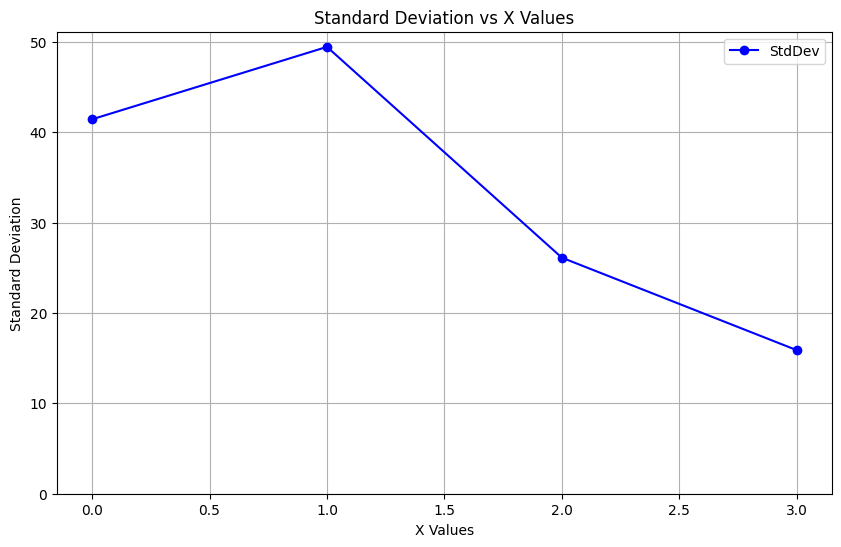

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.fft import fft, rfft, ifft, irfft
from scipy.fft import fftfreq, rfftfreq
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.express as px
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(stddev, marker='o', linestyle='-', color='b', label='StdDev')

# Add title and labels
plt.title('Standard Deviation vs X Values')
plt.xlabel('X Values')
plt.ylabel('Standard Deviation')
plt.ylim(0)
# Show legend
plt.legend()

# Show grid
plt.grid(True)

# Show the plot
plt.show()